# Transfer Learning using VGG-16
- The VGG-16 model was propsed by the Visual Geometry group(VGG) at University of Oxford.
- It contains 16 layers, 13 Convolution Layers and 3 Fully Connected Layers.

## Breakdown of the VGG-16 architecture

1. Input Layer:
    - Input dimensions: (224, 224, 3)
2. Convolutional Layers (64 filters, 3×3 filters, same padding):
    - Two consecutive convolutional layers with 64 filters each and a filter size of 3×3.
    - Same padding is applied to maintain spatial dimensions.
3. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
4. Convolutional Layers (128 filters, 3×3 filters, same padding):
    - Two consecutive convolutional layers with 128 filters each and a filter size of 3×3.
5. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
6. Convolutional Layers (256 filters, 3×3 filters, same padding):
    - Two consecutive convolutional layers with 256 filters each and a filter size of 3×3.
7. Convolutional Layers (512 filters, 3×3 filters, same padding):
    - Two sets of three consecutive convolutional layers with 512 filters each and a filter size of 3×3.
8. Max Pooling Layer (2×2, stride 2):
    - Max-pooling layer with a pool size of 2×2 and a stride of 2.
9. Stack of Convolutional Layers and Max Pooling:
    - Two additional convolutional layers after the previous stack.
    - Filter size: 3×3.
10. Flattening:
    - Flatten the output feature map (7x7x512) into a vector of size 25088.
11. Fully Connected Layers:
    - Three fully connected layers with ReLU activation.
    - First layer with input size 25088 and output size 4096.
    - Second layer with input size 4096 and output size 4096.
    - Third layer with input size 4096 and output size 1000, corresponding to the 1000 classes.
    - Softmax activation is applied to the output of the third fully connected layer for classification.

In [18]:
#import necessary libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
import PIL.Image as Image
from keras.preprocessing import image
from keras.layers import Dense,Flatten
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [19]:
# load the model
classifier = VGG16()

553467096/553467096 [==============================] - 7s 0us/step


In [20]:
# load the image to classify image that is already present in the pre-trained class of VGG-16
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://primopromo.com.au/assets/Uploads/Products/821e25afc0/Sorrento-Coffee-Mug+Red.jpg')
image = Image.open(BytesIO(response.content))

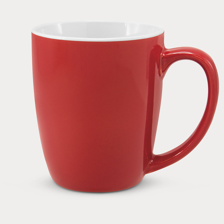

In [21]:
# resize the image
image = image.resize((224, 224))
image

In [22]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [23]:
# prepare the image for the VGG model
image = preprocess_input(image)


In [24]:
# predict the probability across all output classes
yhat = classifier.predict(image)

1/1 [==============================] - 1s 1s/step


In [25]:
# convert the probabilities to class labels
label = decode_predictions(yhat)

35363/35363 [==============================] - 0s 0us/step


In [26]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

In [27]:
# print the classification
print('%s (%.2f%%)'%(label[1],label[2]*100))

coffee_mug (57.38%)


# For images which are not in the pre trained classes

In [1]:
#Download Dataset from Kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:04<00:00, 258MB/s]
100% 1.06G/1.06G [00:04<00:00, 241MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
#Create our custom Dense layer for cats/dogs
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:

#Freeze the convolution layer
conv_base.trainable = False

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 102ms/step - loss: 0.2709 - accuracy: 0.8872 - val_loss: 0.2452 - val_accuracy: 0.8960
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1917 - accuracy: 0.9209 - val_loss: 0.2552 - val_accuracy: 0.8956
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1623 - accuracy: 0.9347 - val_loss: 0.2247 - val_accuracy: 0.9056
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1349 - accuracy: 0.9468 - val_loss: 0.2166 - val_accuracy: 0.9150
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1071 - accuracy: 0.9588 - val_loss: 0.2672 - val_accuracy: 0.9004
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0934 - accuracy: 0.9632 - val_loss: 0.2919 - val_accuracy: 0.9040
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0680 - accuracy: 0.9744 - val_loss: 0.2641 - val_accurac

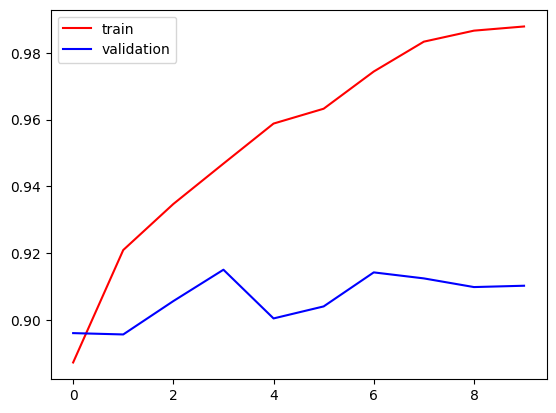

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

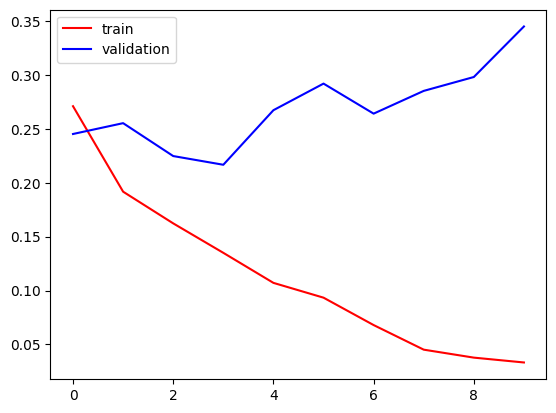

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
#Testing the model.
#Input image(Copy the directory from the test image available in the content)

test_image = load_img('/content/dogs_vs_cats/test/cats/cat.10017.jpg', target_size=(150,150))

test_image = img_to_array(test_image)


# Result array
test_image=test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image=preprocess_input(test_image)
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

1/1 [==============================] - 2s 2s/step
Cat
